In [9]:
import sys
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import math
from sklearn.neighbors import KernelDensity
from scipy.stats import norm


In [3]:
eb_list_all = np.loadtxt('list_all.txt', dtype=float)
eb_list = np.loadtxt('list.txt', dtype=float)
#eb_list_all = 1000 * eb_list_all
#eb_list = 1000 * eb_list

(array([  3.,  13.,  48.,  85., 102.,  91.,  83.,  79.,  47.,  17.,  13.,
         12.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.000226  , 0.00028565, 0.0003453 , 0.00040495, 0.0004646 ,
        0.00052425, 0.0005839 , 0.00064355, 0.0007032 , 0.00076285,
        0.0008225 , 0.00088215, 0.0009418 , 0.00100145, 0.0010611 ,
        0.00112075, 0.0011804 , 0.00124005, 0.0012997 , 0.00135935,
        0.001419  ]),
 <a list of 20 Patch objects>)

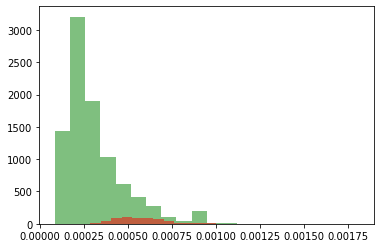

In [4]:
num_bins = 20
# the histogram of the data
plt.hist(eb_list_all, num_bins, color='green', alpha=0.5, label='All edges')
plt.hist(eb_list, num_bins, color='red', alpha=0.5, label='Edges on the cut')

In [5]:
pd.DataFrame(eb_list_all).describe()

,0
count,9257.000000
mean,0.000310
std,0.000173
min,0.000084
25%,0.000194
50%,0.000256
75%,0.000370
max,0.001812


In [6]:
pd.DataFrame(eb_list).describe()

,0
count,602.000000
mean,0.000571
std,0.000146
min,0.000226
25%,0.000466
50%,0.000556
75%,0.000660
max,0.001419


0.16015898097670844
0.03873312253781261
0.03799258701240815
0.03873312253781261


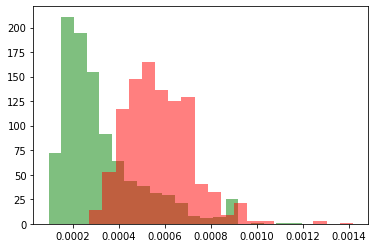

In [16]:
rd_list = eb_list[np.random.choice(len(eb_list), size=1000, replace=True)]
rd_list_all = eb_list_all[np.random.choice(len(eb_list_all), size=1000, replace=True)]
num_bins = 20
# the histogram of the data
plt.hist(rd_list_all, num_bins, color='green', alpha=0.5, label='All edges')
plt.hist(rd_list, num_bins, color='red', alpha=0.5, label='Edges on the cut')
print(stats.entropy(rd_list, rd_list_all))
rd_list.sort()
rd_list_all.sort()
print(stats.entropy(rd_list, rd_list_all))
print(1-np.exp(-1.0 * stats.entropy(rd_list, rd_list_all)))
rd_list_1000 = [x*10000 for x in rd_list]
rd_list_all_1000 = [x*10000 for x in rd_list_all]
print(stats.entropy(rd_list, rd_list_all))

In [52]:
def getKDESamples(input):
    kde_sample = KernelDensity().fit(input)
    return kde_sample.sample(10000)

def getKDEScoredSamples(input):
    kde_sample = KernelDensity().fit(input)
    return kde_sample.score_samples(input)

(array([6.902e+03, 1.898e+03, 6.390e+02, 2.490e+02, 1.300e+02, 6.500e+01,
        4.200e+01, 2.100e+01, 1.900e+01, 1.500e+01, 5.000e+00, 5.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.72667520e-02, 2.90963909e+00, 5.76201143e+00, 8.61438377e+00,
        1.14667561e+01, 1.43191285e+01, 1.71715008e+01, 2.00238731e+01,
        2.28762455e+01, 2.57286178e+01, 2.85809902e+01, 3.14333625e+01,
        3.42857348e+01, 3.71381072e+01, 3.99904795e+01, 4.28428519e+01,
        4.56952242e+01, 4.85475965e+01, 5.13999689e+01, 5.42523412e+01,
        5.71047136e+01, 5.99570859e+01, 6.28094583e+01, 6.56618306e+01,
        6.85142029e+01, 7.13665753e+01, 7.42189476e+01, 7.70713200e+01

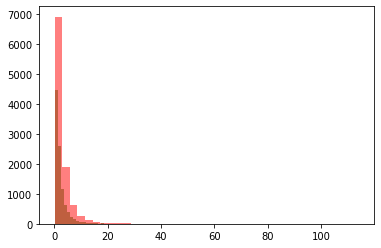

In [57]:
num_bins = 40
# the histogram of the data
plt.hist(np.exp(getKDESamples(eb_list_all.reshape(-1, 1))), num_bins, color='green', alpha=0.5, label='All edges')
plt.hist(np.exp(getKDESamples(eb_list.reshape(-1, 1))), num_bins, color='red', alpha=0.5, label='Edges on the cut')

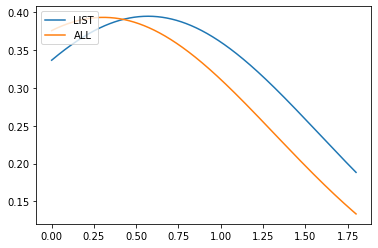

0.007644230826397029
0.007615087999378711


In [62]:
def getKDEScoredSamples_scikit(input, smpl):
    kde_sample = KernelDensity(kernel='gaussian').fit(input)
    return kde_sample.score_samples(smpl)
fig, ax = plt.subplots()
X_plot = np.linspace(0, 1.8, 10000)[:, np.newaxis]
kde_list = np.exp(getKDEScoredSamples_scikit(eb_list.reshape(-1, 1), X_plot))
kde_list_all = np.exp(getKDEScoredSamples_scikit(eb_list_all.reshape(-1, 1), X_plot))
ax.plot(X_plot[:, 0], kde_list, label = 'LIST')
ax.plot(X_plot[:, 0], kde_list_all, label ='ALL')
ax.legend(loc='upper left')
plt.show()
print(stats.entropy(kde_list, kde_list_all))
print(1-np.exp(-1.0 * stats.entropy(kde_list, kde_list_all)))

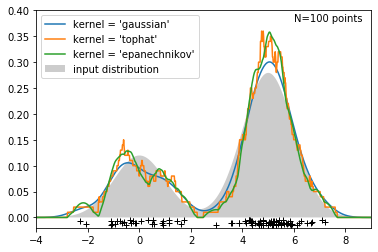

In [4]:
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()



In [6]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
expp = np.exp(log_dens)
expp

array([4.02522330e-09, 4.73555819e-09, 5.56629322e-09, 6.53694387e-09,
       7.67003370e-09, 8.99153211e-09, 1.05313515e-08, 1.23239115e-08,
       1.44087782e-08, 1.68313883e-08, 1.96438674e-08, 2.29059546e-08,
       2.66860451e-08, 3.10623660e-08, 3.61242986e-08, 4.19738653e-08,
       4.87273995e-08, 5.65174179e-08, 6.54947181e-08, 7.58307254e-08,
       8.77201151e-08, 1.01383740e-07, 1.17071892e-07, 1.35067937e-07,
       1.55692351e-07, 1.79307211e-07, 2.06321170e-07, 2.37194966e-07,
       2.72447530e-07, 3.12662719e-07, 3.58496760e-07, 4.10686444e-07,
       4.70058153e-07, 5.37537781e-07, 6.14161621e-07, 7.01088304e-07,
       7.99611871e-07, 9.11176064e-07, 1.03738993e-06, 1.18004482e-06,
       1.34113294e-06, 1.52286746e-06, 1.72770436e-06, 1.95836619e-06,
       2.21786765e-06, 2.50954336e-06, 2.83707773e-06, 3.20453727e-06,
       3.61640518e-06, 4.07761867e-06, 4.59360886e-06, 5.17034355e-06,
       5.81437291e-06, 6.53287825e-06, 7.33372397e-06, 8.22551271e-06,
      

In [15]:
stats.entropy(np.linspace(2, 1500, 1000),list(reversed(np.linspace(30000, 150000, 1000))))


0.5262905992835337

In [69]:
np.linspace(20, 30, 1000)



array([20.        , 20.01001001, 20.02002002, 20.03003003, 20.04004004,
       20.05005005, 20.06006006, 20.07007007, 20.08008008, 20.09009009,
       20.1001001 , 20.11011011, 20.12012012, 20.13013013, 20.14014014,
       20.15015015, 20.16016016, 20.17017017, 20.18018018, 20.19019019,
       20.2002002 , 20.21021021, 20.22022022, 20.23023023, 20.24024024,
       20.25025025, 20.26026026, 20.27027027, 20.28028028, 20.29029029,
       20.3003003 , 20.31031031, 20.32032032, 20.33033033, 20.34034034,
       20.35035035, 20.36036036, 20.37037037, 20.38038038, 20.39039039,
       20.4004004 , 20.41041041, 20.42042042, 20.43043043, 20.44044044,
       20.45045045, 20.46046046, 20.47047047, 20.48048048, 20.49049049,
       20.5005005 , 20.51051051, 20.52052052, 20.53053053, 20.54054054,
       20.55055055, 20.56056056, 20.57057057, 20.58058058, 20.59059059,
       20.6006006 , 20.61061061, 20.62062062, 20.63063063, 20.64064064,
       20.65065065, 20.66066066, 20.67067067, 20.68068068, 20.69